# Computer Vision/Clasificación de objetos

https://www.cs.toronto.edu/~kriz/cifar.html

- Objetivo: Programar una red neuronal para reconocer objetos

- CIFAR es un acrónimo que significa Instituto Canadiense de Investigación Avanzada. El conjunto de datos CIFAR-10 consiste en 60000 imágenes a color de 32x32 para 10 clases de elementos.

Train shape (50000, 32, 32, 3) Target shape: (50000, 1)
Test shape (10000, 32, 32, 3) Target shape: (10000, 1)


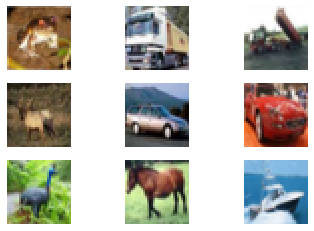

In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

# leer dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



print('Train shape', x_train.shape, 'Target shape:',y_train.shape)
print('Test shape', x_test.shape, 'Target shape:',y_test.shape)
# plotea imagenes
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    plt.axis('off')
    plt.imshow(x_train[i])



plt.show()

## Normalizar datos


- Número de clases es el número de neuronas que tendrá la capa de salida con 'softmax'

In [10]:
import numpy as np
clases = len(np.unique(y_train))
clases

10

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
# con 1: no se cuenta la primera dimensión
x, y, channel = x_train.shape[1:]

input_shape = (x, y, channel)

# escalar entre 0 y 1
# escalar entre 0 y 1
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32') / 255


print(x_train.shape) # (50000, 32, 32, 3)
print(x_test.shape)  # (10000, 32, 32, 3)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [12]:
int(y_test[i])

3

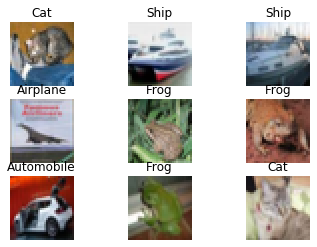

In [13]:
dict = {0:'Airplane', 1:'Automobile', 2:'Bird', 
        3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse',
        8:'Ship', 9:'Truck'}
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title( dict[ int(y_test[i]) ] )


plt.show()

In [14]:
epoch = 35
verbose = 1
batch = 50

## Crear Modelo

In [15]:
def deep_cnn():
    model = Sequential()

    model.add(Conv2D(20, (2, 2), padding='same', activation='relu', 
                     input_shape=input_shape))
    model.add(Conv2D(20, (2, 2), activation='relu'))
    model.add(BatchNormalization(momentum=0.5)) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(60, (2, 2), padding='same', activation='relu'))
    model.add(Conv2D(60, (2, 2), activation='relu'))
    model.add(BatchNormalization(momentum=0.5)) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(120, (2, 2), padding='same', activation='relu'))
    model.add(Conv2D(120, (2, 2), activation='relu'))
    model.add(BatchNormalization(momentum=0.5)) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization(momentum=0.5)) 
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

##  Entrenar modelo
- Nota: El entrenamiento necesita mucho poder de cómputo


In [16]:
model1 = deep_cnn()
model1.summary()

history = model1.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 20)        260       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 31, 31, 20)        1620      
_________________________________________________________________
batch_normalization_4 (Batch (None, 31, 31, 20)        80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 20)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 60)        4860      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 60)       

In [17]:
test_loss, test_acc = model1.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.7944


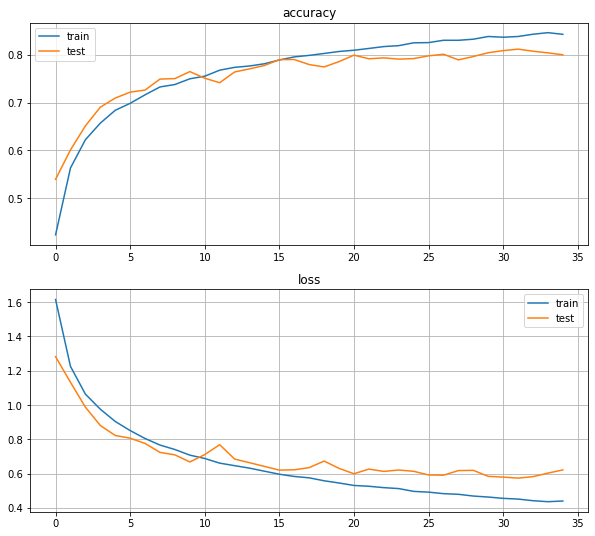

In [18]:
#plot
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()




plt.show()

## Usar red neuronal para reconocer objetos

In [19]:
x_test[[0]].shape

(1, 32, 32, 3)

In [20]:
np.argmax( model1.predict(x_test[[0]]) )

3

Text(0.5, 1.0, 'Etiqueta: Cat Prediccion: Cat')

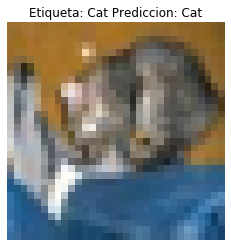

In [21]:
plt.imshow(x_test[0])
plt.axis('off')
plt.title( 'Etiqueta: ' + dict[ int(y_test[0])] + ' '
            'Prediccion: ' + dict[ np.argmax( model1.predict(x_test[[0]]) ) ] )

Text(0.5, 1.0, 'Etiqueta: Ship Prediccion: Ship')

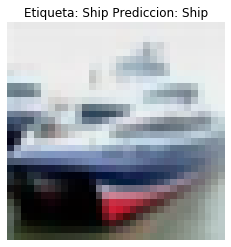

In [22]:
plt.imshow(x_test[1])
plt.axis('off')
plt.title( 'Etiqueta: ' + dict[ int(y_test[1])] + ' '
            'Prediccion: ' + dict[ np.argmax( model1.predict(x_test[[1]]) ) ] )

- Experimentar con la arquitectura de la red, agregando neuronas y capas
- Agregar y modificar la regularización para entrenar en menor tiempo
- Mejorar test accuracy